Kali ini kita akan re structure journal IOP SCIENCE yang membahas mengenai peng-clusteran provinsi di Indonesia. Kali ini kita akan menggunakan KMeans Clustering Method sebagai algoritmanya sesuai dengan jurnal yang ada. 

# Import Library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
upload = files.upload()

Saving prov.csv to prov.csv


In [ ]:
data = pd.read_csv('prov.csv')

In [ ]:
data

,PROVINSI,KEPADATANPENDUDUK,TINGKATPARTISIPASISEKOLAH,TINGKATPENGANGGURANTERBUKA
0,ACEH,5189500,98.09,6.36
1,SUMATERAUTARA,14262100,96.60,5.56
2,SUMATERABARAT,5321500,96.29,5.55
3,RIAU,6657900,94.73,6.30
4,JAMBI,3515000,95.89,3.86
5,SUMATERASELATAN,8267000,94.01,4.23
6,BENGKULU,1934300,92.70,3.51
7,LAMPUNG,8289600,94.26,4.06
8,KEPBANGKA,1430900,92.41,3.65
9,KEPRIAU,2082700,99.08,7.12


In [ ]:
data.keys()

Index(['PROVINSI', 'KEPADATANPENDUDUK', 'TINGKATPARTISIPASISEKOLAH',
       'TINGKATPENGANGGURANTERBUKA'],
      dtype='object')

In [ ]:
data.describe()

,KEPADATANPENDUDUK,TINGKATPARTISIPASISEKOLAH,TINGKATPENGANGGURANTERBUKA
count,3.400000e+01,34.000000,34.000000
mean,6.662565e+06,94.851176,4.861471
std,9.494581e+06,3.735422,1.646552
min,6.911000e+05,79.090000,1.370000
25%,2.177275e+06,93.160000,3.667500
50%,3.845750e+06,95.195000,4.380000
75%,6.323800e+06,97.160000,6.285000
max,4.803760e+07,99.770000,8.520000


In [ ]:
data.head(10)

,PROVINSI,KEPADATANPENDUDUK,TINGKATPARTISIPASISEKOLAH,TINGKATPENGANGGURANTERBUKA
0,ACEH,5189500,98.09,6.36
1,SUMATERAUTARA,14262100,96.60,5.56
2,SUMATERABARAT,5321500,96.29,5.55
3,RIAU,6657900,94.73,6.30
4,JAMBI,3515000,95.89,3.86
5,SUMATERASELATAN,8267000,94.01,4.23
6,BENGKULU,1934300,92.70,3.51
7,LAMPUNG,8289600,94.26,4.06
8,KEPBANGKA,1430900,92.41,3.65
9,KEPRIAU,2082700,99.08,7.12


In [ ]:
data.tail()

,PROVINSI,KEPADATANPENDUDUK,TINGKATPARTISIPASISEKOLAH,TINGKATPENGANGGURANTERBUKA
29,SULAWESIBARAT,1331000,89.88,3.16
30,MALUKU,1744700,96.86,7.27
31,MALUKUUTARA,1209300,97.24,4.77
32,PAPUABARAT,915400,96.92,6.30
33,PAPUA,3265200,79.09,3.20


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


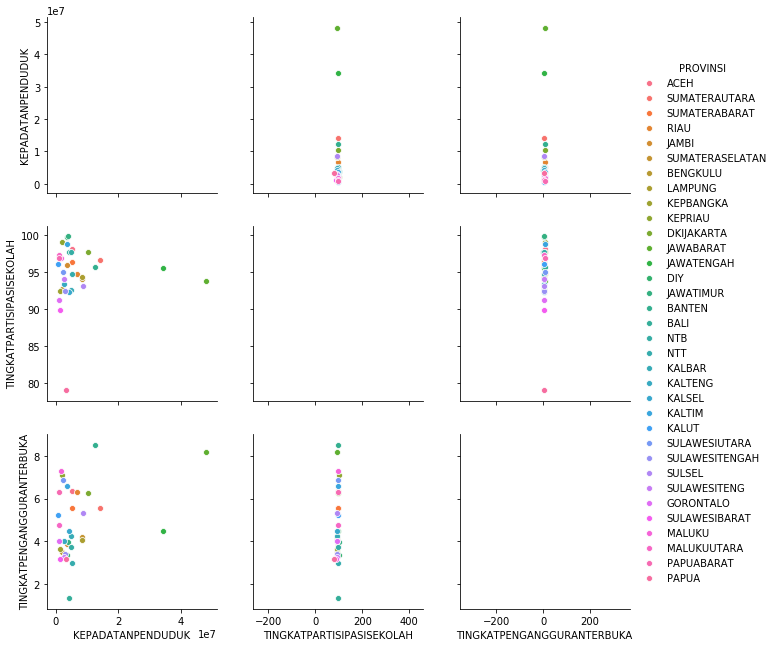

In [ ]:
import seaborn as sns
sns.pairplot(data, hue='PROVINSI', size=3)

In [ ]:
x = data.iloc[:, [1,2,3]].values
#:semua baris, [kolom].nilai yang ada didalamnya

In [ ]:
x

array([[5.18950e+06, 9.80900e+01, 6.36000e+00],
       [1.42621e+07, 9.66000e+01, 5.56000e+00],
       [5.32150e+06, 9.62900e+01, 5.55000e+00],
       [6.65790e+06, 9.47300e+01, 6.30000e+00],
       [3.51500e+06, 9.58900e+01, 3.86000e+00],
       [8.26700e+06, 9.40100e+01, 4.23000e+00],
       [1.93430e+06, 9.27000e+01, 3.51000e+00],
       [8.28960e+06, 9.42600e+01, 4.06000e+00],
       [1.43090e+06, 9.24100e+01, 3.65000e+00],
       [2.08270e+06, 9.90800e+01, 7.12000e+00],
       [1.03742e+07, 9.76400e+01, 6.24000e+00],
       [4.80376e+07, 9.37700e+01, 8.17000e+00],
       [3.42579e+07, 9.54800e+01, 4.51000e+00],
       [3.76220e+06, 9.96300e+01, 3.35000e+00],
       [3.92930e+06, 9.97700e+01, 3.99000e+00],
       [1.24482e+07, 9.56700e+01, 8.52000e+00],
       [4.24650e+06, 9.77200e+01, 1.37000e+00],
       [4.95560e+06, 9.76900e+01, 3.72000e+00],
       [5.28730e+06, 9.47600e+01, 3.01000e+00],
       [4.93250e+06, 9.25100e+01, 4.26000e+00],
       [2.60530e+06, 9.33700e+01, 4.0100

In [ ]:
#menstandarkan ukuran variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[-1.57481118e-01  8.80096212e-01  9.23787874e-01]
 [ 8.12444497e-01  4.75213592e-01  4.30617508e-01]
 [-1.43369377e-01  3.90976268e-01  4.24452878e-01]
 [-4.98690312e-04 -3.29276825e-02  8.86800097e-01]
 [-3.36497105e-01  2.82282948e-01 -6.17369521e-01]
 [ 1.71525570e-01 -2.28575660e-01 -3.89278227e-01]
 [-5.05485203e-01 -5.84546285e-01 -8.33131557e-01]
 [ 1.73941671e-01 -1.60642334e-01 -4.94076930e-01]
 [-5.59302251e-01 -6.63348943e-01 -7.46826743e-01]
 [-4.89620185e-01  1.14911218e+00  1.39229972e+00]
 [ 3.96800272e-01  7.57816226e-01  8.49812319e-01]
 [ 4.42328622e+00 -2.93791652e-01  2.03958583e+00]
 [ 2.95013806e+00  1.70872294e-01 -2.16668599e-01]
 [-3.10069663e-01  1.29856550e+00 -9.31765630e-01]
 [-2.92205481e-01  1.33660816e+00 -5.37229337e-01]
 [ 6.18525656e-01  2.22501621e-01  2.25534786e+00]
 [-2.58294540e-01  7.79554890e-01 -2.15236229e+00]
 [-1.82486695e-01  7.71402891e-01 -7.03674336e-01]
 [-1.47025601e-01 -2.47756834e-02 -1.14136304e+00]
 [-1.84956250e-01 -6.36175612e-

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=123)
kmeans.fit(x_scaled)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


In [ ]:
#Menampilkan nilai centroid yang digenerate oleh classifier
print(kmeans.cluster_centers_)

[[-0.12674799  0.53001314  1.0049555 ]
 [-0.36320251 -4.28283652 -1.02423507]
 [ 3.68671214 -0.06145968  0.91145861]
 [-0.32709106  0.85292288 -0.83313156]
 [-0.27128458 -0.54399532 -0.60456606]]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
PROVINSI                      34 non-null object
KEPADATANPENDUDUK             34 non-null int64
TINGKATPARTISIPASISEKOLAH     34 non-null float64
TINGKATPENGANGGURANTERBUKA    34 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
import numpy as np
print(kmeans.labels_)

[0 0 0 0 3 4 4 4 4 0 0 2 2 3 3 0 3 3 4 4 4 4 0 0 0 4 4 4 4 4 0 3 0 1]


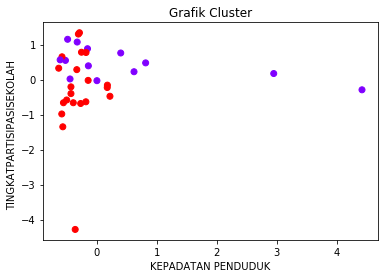

In [ ]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('KEPADATAN PENDUDUK')
plt.ylabel('TINGKATPARTISIPASISEKOLAH  ')
plt.title('Grafik Cluster')
plt.show()

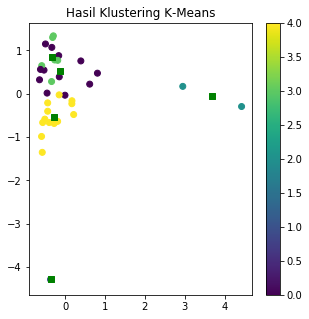

In [ ]:
#--- Memvisualkan hasil kluster ---
#--- Menambahkan Kolom "kluster" Dalam Data Frame PENDUDUK ---
#import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
#width,height

data["kluster"] = kmeans.labels_
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], c = data.kluster, marker = "o", alpha = 1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', alpha=1 , marker="s")
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

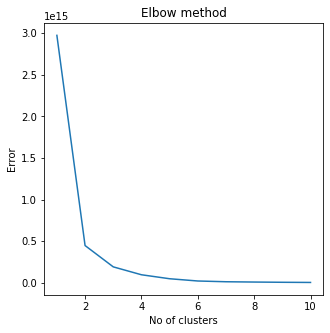

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters = i).fit(x)
    kmeans_elbow.fit(x)
    Error.append(kmeans_elbow.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
# ambil input
KEPADATANPENDUDUK =  50000#@param {type:"number"}
TINGKATPARTISIPASISEKOLAH =  13#@param {type:"number"}
TINGKATPENGANGGURANTERBUKA =  20#@param {type:"number"}

# buat vektor untuk uji
x_coba = [[KEPADATANPENDUDUK, TINGKATPARTISIPASISEKOLAH, TINGKATPENGANGGURANTERBUKA]]
x_coba = scaler.transform(x_coba)

# prediksikan dengan model
y_pred = kmeans.predict(x_coba)

# cetak hasil
print("Hasil prediksi: %s" % y_pred[0])

Hasil prediksi: 1
